In [77]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from imageproc import get_pocillos, complete_the_grid, draw_circles, get_mean_vals_array, circle_crop

# Constant GFP
* We try to get a measure with little variance of fluorescence. 
* It looks like *the mean* of the green channel on all the pixels of the pocillo works good.
* The 90 percentile has a little more variation but it seems to leave more space between the activated and the deactivated pocitos (could be good for measuring intensities of 'on') 
* Detectar on/off sense problemes, detectar intesitats no ho sé.
* Última fila queda desafavorida.

In [78]:
img = cv2.imread("/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/03. KOA DATA/AutomataLab/pics/_home_pi_Pictures_Picture____2023-05-02_13_23_49_P1_Cam1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

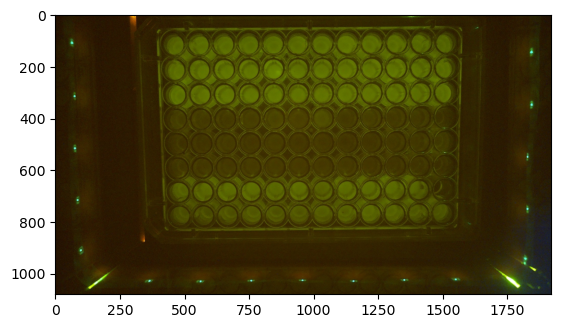

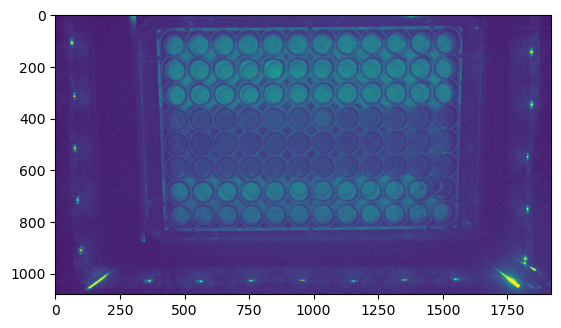

In [79]:
plt.imshow(img)
plt.show()
plt.imshow(img[:,:,1])
plt.show()

In [59]:
circles = get_pocillos(img_bw)
new_circles = complete_the_grid(circles)

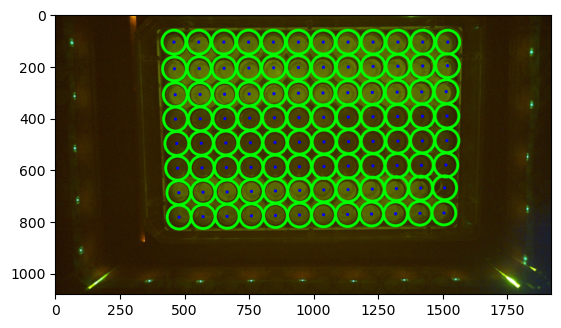

In [60]:
draw_circles(img, new_circles)

In [81]:
# This code computes the mean/max/q3 of the green channel of each pocillo
grid_positions = new_circles[:,3:5]

mean_output_array = np.zeros((8,12))
max_output_array = np.zeros((8,12))
q9_output_array = np.zeros((8,12))

for i, position in enumerate(grid_positions):
        cropped_pocillo = circle_crop(img, new_circles[i,0:3])
        #plt.imshow(cropped_pocillo)
        #plt.show()
        cropped_pocillo_green = cropped_pocillo[:,:,1]
        mean_output_array[position[0], position[1]] = np.mean(cropped_pocillo_green[cropped_pocillo_green != 0])
        max_output_array[position[0], position[1]] = np.max(cropped_pocillo_green[cropped_pocillo_green != 0])
        q9_output_array[position[0], position[1]] = np.percentile(cropped_pocillo_green[cropped_pocillo_green != 0], 90)

In [82]:
# Mean green
mean_output_array.astype(int)

array([[ 74,  84,  85,  86,  87,  88,  87,  93,  88,  86,  82,  72],
       [ 84,  92,  95,  95, 102,  94,  94,  97,  96,  96,  90,  80],
       [ 85,  91,  93,  93,  94,  92,  92,  95,  94,  94,  91,  82],
       [ 54,  57,  57,  62,  66,  65,  70,  60,  62,  59,  55,  47],
       [ 48,  51,  56,  55,  58,  56,  57,  55,  55,  55,  54,  51],
       [ 51,  55,  57,  58,  59,  58,  58,  59,  56,  55,  53,  47],
       [ 72,  80,  84,  86,  84,  86,  80,  88,  87,  85,  73,  47],
       [ 59,  63,  68,  72,  71,  73,  75,  77,  80,  77,  70,  61]])

In [83]:
# Max green
max_output_array.astype(int)

array([[112, 118, 118, 120, 119, 125, 116, 124, 119, 114, 133, 109],
       [123, 124, 127, 128, 150, 126, 125, 125, 125, 127, 122, 116],
       [123, 124, 125, 125, 125, 121, 121, 127, 121, 123, 121, 127],
       [102,  98, 111, 111, 123, 121, 122, 129, 127, 116,  98, 109],
       [ 91,  92,  97, 114, 106, 109, 103,  93, 104, 110, 151, 171],
       [ 89,  92,  94, 102,  96, 100, 104, 107, 115, 101,  89,  90],
       [105, 111, 113, 115, 112, 116, 107, 119, 124, 117, 106,  95],
       [ 88,  93,  97, 103, 105, 101, 107, 109, 110, 108, 101,  92]])

In [84]:
# Q9 green 
q9_output_array.astype(int)

array([[104, 110, 110, 109, 110, 111, 109, 116, 111, 109, 105, 101],
       [111, 116, 118, 118, 130, 118, 116, 118, 118, 118, 114, 109],
       [114, 116, 117, 118, 119, 115, 116, 117, 115, 116, 111, 111],
       [ 65,  65,  66,  72,  77,  75,  81,  72,  72,  68,  63,  56],
       [ 57,  57,  63,  64,  65,  66,  66,  63,  63,  61,  62,  62],
       [ 61,  64,  66,  71,  70,  70,  70,  69,  68,  64,  60,  56],
       [ 96, 103, 107, 108, 104, 109,  98, 109, 107, 106,  99,  62],
       [ 79,  80,  86,  91,  89,  90,  94,  96, 103,  98,  89,  84]])

In [89]:
# Which measure gives less variation?
print("Taking means:", np.std(mean_output_array[[0,1,2,6],:-1]))
print("Taking max:", np.std(max_output_array[[0,1,2,6],:-1]))
print("Taking q9:", np.std(q9_output_array[[0,1,2,6],:-1]))

Taking means: 6.44413820859926
Taking max: 7.557048868659365
Taking q9: 6.46170377706061


In [87]:
np.mean(mean_output_array[[0,1,2]]) - np.mean(mean_output_array[[3,4,5]])

33.141459895649845

In [88]:
np.mean(q9_output_array[[0,1,2]]) - np.mean(q9_output_array[[3,4,5]])

47.866666666666674

# Constant OD

In [100]:
img = cv2.imread("/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/03. KOA DATA/AutomataLab/pics/_home_pi_Pictures_Picture_Patogen_10M5_#1_2023-05-02_12_56_00_P2_Cam3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

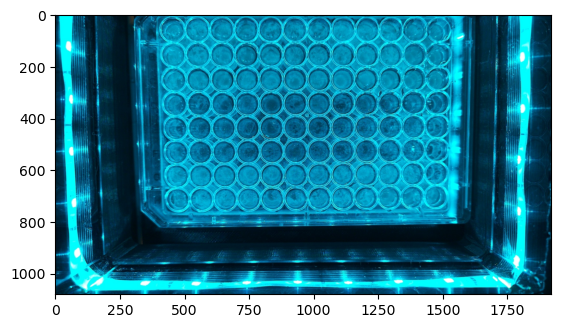

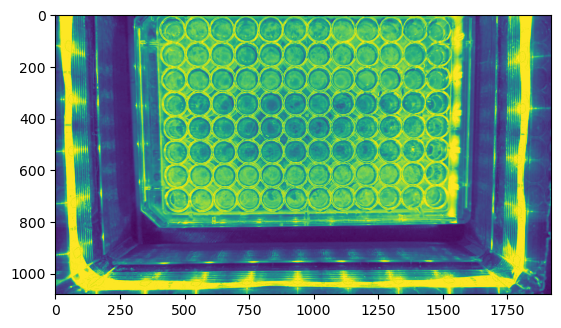

In [107]:
plt.imshow(img)
plt.show()
plt.imshow(img[:,:,2])
plt.show()

In [102]:
circles = get_pocillos(img_bw)
new_circles = complete_the_grid(circles)

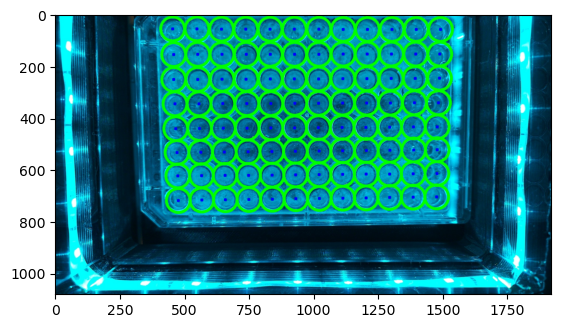

In [103]:
draw_circles(img, new_circles)

In [104]:
grid_positions = new_circles[:,3:5]

mean_output_array = np.zeros((8,12))
max_output_array = np.zeros((8,12))
q9_output_array = np.zeros((8,12))

for i, position in enumerate(grid_positions):
        cropped_pocillo = circle_crop(img, new_circles[i,0:3])
        #plt.imshow(cropped_pocillo)
        #plt.show()
        cropped_pocillo_blue = cropped_pocillo[:,:,2]
        mean_output_array[position[0], position[1]] = np.mean(cropped_pocillo_blue[cropped_pocillo_blue != 0])
        max_output_array[position[0], position[1]] = np.max(cropped_pocillo_blue[cropped_pocillo_blue != 0])
        q9_output_array[position[0], position[1]] = np.percentile(cropped_pocillo_blue[cropped_pocillo_blue != 0], 90)

In [105]:
mean_output_array.astype(int)

array([[177, 185, 175, 168, 166, 174, 170, 186, 181, 180, 174, 180],
       [195, 186, 181, 161, 171, 168, 171, 180, 183, 189, 174, 178],
       [190, 178, 171, 174, 173, 166, 169, 180, 174, 177, 174, 178],
       [180, 158, 156, 157, 138, 146, 153, 146, 154, 159, 165, 163],
       [179, 159, 160, 145, 140, 146, 140, 154, 163, 169, 179, 178],
       [183, 162, 165, 153, 153, 145, 153, 156, 162, 172, 181, 181],
       [199, 191, 186, 187, 177, 179, 181, 186, 191, 197, 196, 191],
       [190, 200, 198, 193, 181, 179, 186, 192, 194, 195, 197, 197]])

In [97]:
max_output_array.astype(int)

array([[191, 234, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [253, 246, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]])

In [98]:
q9_output_array.astype(int)

array([[ 84, 115, 141, 158, 184, 209, 215, 227, 232, 231, 232, 236],
       [156, 167, 185, 191, 204, 216, 219, 227, 230, 230, 234, 234],
       [197, 209, 214, 215, 216, 224, 221, 220, 223, 231, 234, 236],
       [224, 223, 215, 218, 218, 218, 218, 220, 218, 230, 233, 229],
       [234, 231, 227, 221, 220, 222, 220, 220, 224, 234, 233, 237],
       [237, 234, 230, 229, 227, 221, 226, 226, 225, 232, 238, 235],
       [238, 230, 232, 231, 232, 226, 232, 233, 235, 237, 239, 240],
       [236, 241, 237, 235, 233, 229, 230, 236, 238, 239, 240, 246]])

In [99]:
print("Taking means:", np.std(mean_output_array[[2,6,7],:-1]))
print("Taking max:", np.std(max_output_array[[2,6,7],:-1]))
print("Taking q3:", np.std(q3_output_array[[2,6,7],:-1]))

Taking means: 12.875596497344302
Taking max: 0.0
Taking q3: 9.919233063750582
